In [2]:
from qiskit import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute,assemble,QuantumCircuit, aqua
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.extensions import *
provider = IBMQ.load_account()

from qiskit.quantum_info import random_unitary

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
from math import pi, sqrt
from qiskit.circuit import Parameter

from random import seed
from random import random
import cmath

C:\Users\Saesun Kim\anaconda3\envs\name_of_my_env\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [3]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Function
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import random

import qiskit
from qiskit import transpile, assemble
from qiskit.visualization import *

In [4]:
import random
from random import seed
from random import random

import numpy as np
import matplotlib.pyplot as plt

from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot

import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture
from sklearn.neighbors import KernelDensity

import random

In [5]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

def readfile(name):
    f = open (name , 'r')
    l = []
    l = [line.split() for line in f]
    l = np.array(l)
    return l

def strtoeval1(file):
    tt=[]
    for i in range(len(file)):
        tt.append([eval(file[i][0]),eval(file[i][1])])
    return tt

def strtoeval2(file):
    tt=[]
    for i in range(len(file)):
        tt.append(int(eval(file[i][0])))
    return tt

In [6]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

data1Path = r'C:\Users\Saesun Kim\Documents\GitHub\Quantum_Machine_Learning_Express\dataset\data1a.txt'
data1Label = r'C:\Users\Saesun Kim\Documents\GitHub\Quantum_Machine_Learning_Express\dataset\data1alabel.txt'

# Use relative paths to make it easier for other
# users to read the data.
data1Path = r'../dataset/data1a.txt'
data1Label = r'../dataset/data1alabel.txt'

data1a = np.array(strtoeval1(readfile(data1Path)))
data1alabel = np.array(strtoeval2(readfile(data1Label)))
ct=Counter(data1alabel)


from sklearn.utils import shuffle

# Set random_state to a fixed value so that you always
# get the same shuffle (at least, for now)
a_shuffled, b_shuffled = shuffle(data1a, data1alabel, random_state=0)
a_shuffled[0], b_shuffled[0]

(array([0.54, 0.51]), 0)

In [7]:
def cN(eqs,string):
    if string in eqs:
        return eqs[string]   
    else:
        return 0

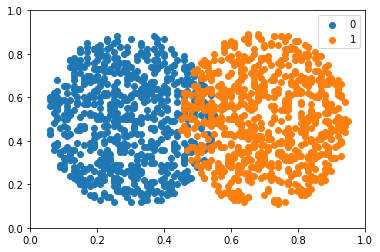

In [8]:
def my_plot(data,lab,counter):
    #This function generate the plot of the labeled data
    
    for label, _ in counter.items():
        row_ix = where(lab == label)[0]
        pyplot.scatter(data[row_ix, 0], data[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.xlim([0, 1])
    pyplot.ylim([0, 1])
    pyplot.show()
    

my_plot(data1a,data1alabel,ct)

In [9]:
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator, UnitarySimulator


backend = Aer.get_backend('qasm_simulator')
def lossCal2qubit(i,theta,nshot):    
    #i th data
    #parameter
    #return loss

    qr = QuantumRegister(2)
    cr = ClassicalRegister(2)
    qc = QuantumCircuit(qr,cr)

    qc.rx(a_shuffled[i][0],qr[0])
    qc.rx(a_shuffled[i][1],qr[1])
    
    qc.ry(pi/4,qr[:])
    qc.rz(pi/4,qr[:])
    

    
    count=0;
    for i in range(2):
        qc.rx(theta[count],qr[i])
        count=count+1
    for i in range(2):
        qc.rz(theta[count],qr[i])
        count=count+1   

    qc.measure(qr[:],cr[:])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()
    lm=-1*(cN(count,'00')+cN(count,'01'))
    lp=1*(cN(count,'10')+cN(count,'11'))

    loss1=abs(
        (lm+lp)/nshot
        -2*(b_shuffled[i]-0.5)
    )
    loss2=((lm+lp)/nshot-2*(b_shuffled[i]-0.5))**2

    return loss1
lossCal2qubit(8,[1,1,1,1],10)

0.0

In [26]:
#

theta=[0,0,0,0];
def SPSA(i,th,c1,delta,nshot):
    sp=[];
    c2=[[c1,0,0,0],[0,c1,0,0],[0,0,c1,0],[0,0,0,c1]]
    for x1 in range(4):
        sp.append((lossCal2qubit(i,th+np.array(c2[x1]),nshot)-lossCal2qubit(i,th-np.array(c2[x1]),nshot))/(2*delta))
    return sp

SPSA(1,theta,0.1,5,10000)

[0.0010600000000000054,
 -0.0062799999999999965,
 0.0008600000000000052,
 0.00018000000000000237]

In [27]:
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator, UnitarySimulator


backend = Aer.get_backend('qasm_simulator')
def lossCal2qubit(i,theta,nshot):    
    #i th data
    #parameter
    #return loss

    qr = QuantumRegister(2)
    cr = ClassicalRegister(2)
    qc = QuantumCircuit(qr,cr)

    qc.rx(a_shuffled[i][0],qr[0])
    qc.rx(a_shuffled[i][1],qr[1])
    
    qc.ry(pi/4,qr[:])
    qc.rz(pi/4,qr[:])
    
    
    count=0;
    for i in range(2):
        qc.rx(theta[count],qr[i])
        count=count+1
    for i in range(2):
        qc.rz(theta[count],qr[i])
        count=count+1   

    qc.measure(qr[:],cr[:])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()
    lm=-1*(cN(count,'00')+cN(count,'11'))
    lp=1*(cN(count,'10')+cN(count,'01'))

    loss1=abs(
        (lm+lp)/nshot
        -2*(b_shuffled[i]-0.5)
    )
    loss2=((lm+lp)/nshot-2*(b_shuffled[i]-0.5))**2

    return loss1
lossCal2qubit(8,[1,1,1,1],10)

0.4

In [42]:
#

theta=[0,0,0,0];
def SPSA(i,th,c1,delta,nshot):
    sp=[];
    c2=[[c1,0,0,0],[0,c1,0,0],[0,0,c1,0],[0,0,0,c1]]
    for x1 in range(4):
        sp.append((lossCal2qubit(i,th+np.array(c2[x1]),nshot)-lossCal2qubit(i,th-np.array(c2[x1]),nshot))/(2*delta*c1))
    return sp

SPSA(1,theta,0.1,5,10000)

[-0.025799999999999934,
 -0.07239999999999991,
 0.007999999999999896,
 -0.009399999999999964]

In [35]:
theta

array([[5.46415161, 1.09581611, 2.56528056, 4.66679491]])

In [43]:
progress=[];
np.random.seed(0)
theta=np.random.uniform(low=0, high=2*np.pi, size=4)#[0,0,0,0];
thdata=[];

c1=0.1   
delta=1
nshot=10**4;
theta=np.array(theta)-SPSA(1,theta,c1,delta,nshot)

for ep in range(50):
    delta=random.random()+0.1
    theta=theta-SPSA(1,theta,c1,delta,nshot)
    print(ep,"th iteration L=",lossCal2qubit(1,theta,nshot))
    progress.append(lossCal2qubit(1,theta,nshot))
    thdata.append(theta)

0 th iteration L= 0.43899999999999995
1 th iteration L= 0.384
2 th iteration L= 0.376
3 th iteration L= 0.3718
4 th iteration L= 0.392
5 th iteration L= 0.35719999999999996
6 th iteration L= 0.37439999999999996
7 th iteration L= 0.3882
8 th iteration L= 0.3762
9 th iteration L= 0.37
10 th iteration L= 0.3994
11 th iteration L= 0.43600000000000005
12 th iteration L= 0.38680000000000003
13 th iteration L= 0.45120000000000005
14 th iteration L= 0.3792
15 th iteration L= 0.36719999999999997
16 th iteration L= 0.3782
17 th iteration L= 0.37060000000000004
18 th iteration L= 0.37739999999999996
19 th iteration L= 0.3738
20 th iteration L= 0.3762
21 th iteration L= 0.3808
22 th iteration L= 0.37439999999999996
23 th iteration L= 0.3964
24 th iteration L= 0.38480000000000003
25 th iteration L= 0.3822
26 th iteration L= 0.3892
27 th iteration L= 0.5396000000000001
28 th iteration L= 0.37560000000000004
29 th iteration L= 0.3944
30 th iteration L= 0.37139999999999995
31 th iteration L= 0.3836000

After 1000 iteration we have theta = [3.46568113 3.51005415 4.32839873 3.04358669]


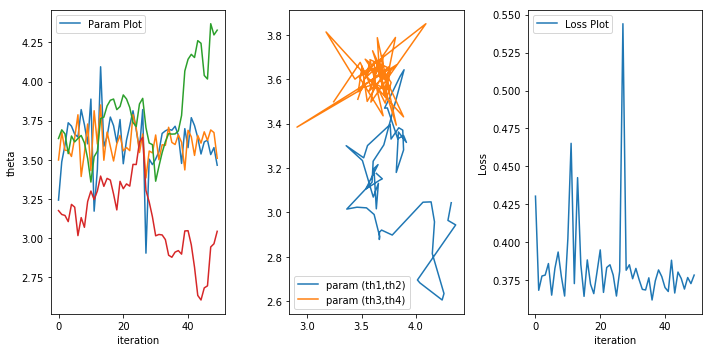

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
print('After 1000 iteration we have theta =',theta)
axes[0].plot(thdata)
axes[0].set_ylabel('theta')
axes[0].legend(['Param Plot'])
axes[0].set_xlabel('iteration')
axes[1].plot([item[2] for item in thdata],[item[3] for item in thdata],[item[0] for item in thdata],[item[1] for item in thdata])
axes[1].legend(['param (th1,th2)','param (th3,th4)'])

axes[2].plot(progress)
axes[2].legend(['Loss Plot'])
axes[2].set_ylabel('Loss')
axes[2].set_xlabel('iteration')
fig.tight_layout()

# Not Same Circuit?

In [16]:
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator, UnitarySimulator


backend = Aer.get_backend('qasm_simulator')
def lossCal2qubit(i,theta,nshot):    
    #i th data
    #parameter
    #return loss

    qr = QuantumRegister(2)
    cr = ClassicalRegister(2)
    qc = QuantumCircuit(qr,cr)

    qc.rx(a_shuffled[i][0],qr[0])
    qc.rx(a_shuffled[i][1],qr[1])
    
    qc.cz(qr[0],qr[1])
    
    count=0;
    for i in range(2):
        qc.rx(theta[count],qr[i])
        count=count+1
    for i in range(2):
        qc.rz(theta[count],qr[i])
        count=count+1   

    qc.measure(qr[:],cr[:])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()
    lm=-1*(cN(count,'00')+cN(count,'01'))
    lp=1*(cN(count,'10')+cN(count,'11'))

    loss1=abs(
        (lm+lp)/nshot
        -2*(b_shuffled[i]-0.5)
    )
    loss2=((lm+lp)/nshot-2*(b_shuffled[i]-0.5))**2

    return loss1
lossCal2qubit(8,[1,1,1,1],10)

1.0

In [17]:
#

theta=[0,0,0,0];
def SPSA(i,th,c1,delta,nshot):
    sp=[];
    c2=[[c1,0,0,0],[0,c1,0,0],[0,0,c1,0],[0,0,0,c1]]
    for x1 in range(4):
        sp.append((lossCal2qubit(i,th+np.array(c2[x1]),nshot)-lossCal2qubit(i,th-np.array(c2[x1]),nshot))/(2*delta))
    return sp

SPSA(1,theta,0.1,5,10000)

[0.00010000000000001119,
 -0.0023800000000000045,
 -0.00035999999999998257,
 0.00010000000000001119]

In [18]:
progress=[];
theta=[0,0,0,0];
thdata=[];

c1=0.1   
delta=6
nshot=1000;
theta=np.array(theta)-SPSA(1,theta,c1,delta,nshot)
for ep in range(4000):
    delta=random.random()+0.1
    theta=theta-SPSA(1,theta,c1,delta,nshot)
    print(ep,"th iteration L=",lossCal2qubit(1,theta,nshot))
    progress.append(lossCal2qubit(1,theta,nshot))
    thdata.append(theta)

0 th iteration L= 1.992
1 th iteration L= 1.992
2 th iteration L= 1.98
3 th iteration L= 1.98
4 th iteration L= 1.954
5 th iteration L= 1.892
6 th iteration L= 1.834
7 th iteration L= 1.732
8 th iteration L= 1.726
9 th iteration L= 1.552
10 th iteration L= 1.37
11 th iteration L= 1.214
12 th iteration L= 1.032
13 th iteration L= 0.85
14 th iteration L= 0.488
15 th iteration L= 0.20999999999999996
16 th iteration L= 0.14
17 th iteration L= 0.09599999999999997
18 th iteration L= 0.10199999999999998
19 th iteration L= 0.052000000000000046
20 th iteration L= 0.02400000000000002
21 th iteration L= 0.016000000000000014
22 th iteration L= 0.01200000000000001
23 th iteration L= 0.020000000000000018
24 th iteration L= 0.010000000000000009
25 th iteration L= 0.008000000000000007
26 th iteration L= 0.0040000000000000036
27 th iteration L= 0.0040000000000000036
28 th iteration L= 0.0020000000000000018
29 th iteration L= 0.0020000000000000018
30 th iteration L= 0.0040000000000000036
31 th iteration

219 th iteration L= 0.008000000000000007
220 th iteration L= 0.008000000000000007
221 th iteration L= 0.006000000000000005
222 th iteration L= 0.006000000000000005
223 th iteration L= 0.0040000000000000036
224 th iteration L= 0.0
225 th iteration L= 0.0020000000000000018
226 th iteration L= 0.0
227 th iteration L= 0.01200000000000001
228 th iteration L= 0.008000000000000007
229 th iteration L= 0.006000000000000005
230 th iteration L= 0.006000000000000005
231 th iteration L= 0.006000000000000005
232 th iteration L= 0.0040000000000000036
233 th iteration L= 0.006000000000000005
234 th iteration L= 0.008000000000000007
235 th iteration L= 0.0020000000000000018
236 th iteration L= 0.0020000000000000018
237 th iteration L= 0.0020000000000000018
238 th iteration L= 0.0040000000000000036
239 th iteration L= 0.006000000000000005
240 th iteration L= 0.0040000000000000036
241 th iteration L= 0.0
242 th iteration L= 0.0
243 th iteration L= 0.0020000000000000018
244 th iteration L= 0.0040000000000

430 th iteration L= 0.008000000000000007
431 th iteration L= 0.0
432 th iteration L= 0.010000000000000009
433 th iteration L= 0.0020000000000000018
434 th iteration L= 0.0040000000000000036
435 th iteration L= 0.0040000000000000036
436 th iteration L= 0.0040000000000000036
437 th iteration L= 0.006000000000000005
438 th iteration L= 0.0040000000000000036
439 th iteration L= 0.008000000000000007
440 th iteration L= 0.0
441 th iteration L= 0.0020000000000000018
442 th iteration L= 0.01200000000000001
443 th iteration L= 0.01200000000000001
444 th iteration L= 0.0040000000000000036
445 th iteration L= 0.006000000000000005
446 th iteration L= 0.0020000000000000018
447 th iteration L= 0.0040000000000000036
448 th iteration L= 0.006000000000000005
449 th iteration L= 0.0020000000000000018
450 th iteration L= 0.006000000000000005
451 th iteration L= 0.010000000000000009
452 th iteration L= 0.0020000000000000018
453 th iteration L= 0.0020000000000000018
454 th iteration L= 0.004000000000000003

640 th iteration L= 0.0
641 th iteration L= 0.006000000000000005
642 th iteration L= 0.006000000000000005
643 th iteration L= 0.0040000000000000036
644 th iteration L= 0.0040000000000000036
645 th iteration L= 0.0020000000000000018
646 th iteration L= 0.0040000000000000036
647 th iteration L= 0.0
648 th iteration L= 0.006000000000000005
649 th iteration L= 0.0040000000000000036
650 th iteration L= 0.008000000000000007
651 th iteration L= 0.0
652 th iteration L= 0.006000000000000005
653 th iteration L= 0.0020000000000000018
654 th iteration L= 0.0
655 th iteration L= 0.0040000000000000036
656 th iteration L= 0.008000000000000007
657 th iteration L= 0.006000000000000005
658 th iteration L= 0.0020000000000000018
659 th iteration L= 0.0020000000000000018
660 th iteration L= 0.0040000000000000036
661 th iteration L= 0.006000000000000005
662 th iteration L= 0.0040000000000000036
663 th iteration L= 0.006000000000000005
664 th iteration L= 0.006000000000000005
665 th iteration L= 0.0020000000

KeyboardInterrupt: 

After 1000 iteration we have theta = [-0.36356837  3.00789919 -0.08724569 -0.22843898]


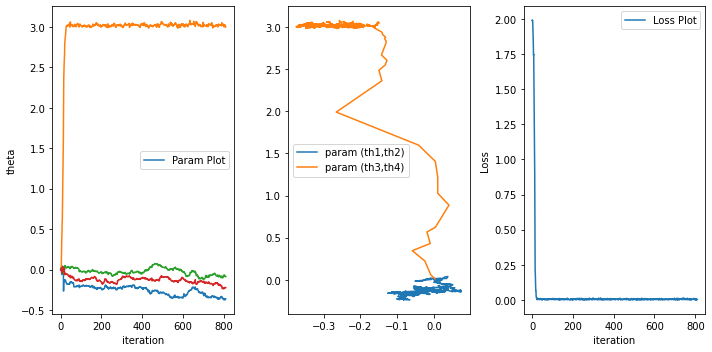

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
print('After 1000 iteration we have theta =',theta)
axes[0].plot(thdata)
axes[0].set_ylabel('theta')
axes[0].legend(['Param Plot'])
axes[0].set_xlabel('iteration')
axes[1].plot([item[2] for item in thdata],[item[3] for item in thdata],[item[0] for item in thdata],[item[1] for item in thdata])
axes[1].legend(['param (th1,th2)','param (th3,th4)'])

axes[2].plot(progress)
axes[2].legend(['Loss Plot'])
axes[2].set_ylabel('Loss')
axes[2].set_xlabel('iteration')
fig.tight_layout()

# Not Same +

In [50]:
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator, UnitarySimulator


backend = Aer.get_backend('qasm_simulator')
def lossCal2qubit(i,theta,nshot):    
    #i th data
    #parameter
    #return loss

    qr = QuantumRegister(2)
    cr = ClassicalRegister(2)
    qc = QuantumCircuit(qr,cr)

    qc.rx(a_shuffled[i][0],qr[0])
    qc.rx(a_shuffled[i][1],qr[1])
    qc.ry(pi/4,qr[:])
    qc.rz(pi/4,qr[:])
        
    qc.cz(qr[0],qr[1])
    
    count=0;
    for i in range(2):
        qc.rx(theta[count],qr[i])
        count=count+1
    for i in range(2):
        qc.rz(theta[count],qr[i])
        count=count+1   

    qc.measure(qr[:],cr[:])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()
    lm=-1*(cN(count,'00')+cN(count,'01'))
    lp=1*(cN(count,'10')+cN(count,'11'))

    loss1=abs(
        (lm+lp)/nshot
        -2*(b_shuffled[i]-0.5)
    )
    loss2=((lm+lp)/nshot-2*(b_shuffled[i]-0.5))**2

    return loss1
lossCal2qubit(8,[1,1,1,1],10)

1.0

In [51]:
#

theta=[0,0,0,0];
def SPSA(i,th,c1,delta,nshot):
    sp=[];
    c2=[[c1,0,0,0],[0,c1,0,0],[0,0,c1,0],[0,0,0,c1]]
    for x1 in range(4):
        sp.append((lossCal2qubit(i,th+np.array(c2[x1]),nshot)-lossCal2qubit(i,th-np.array(c2[x1]),nshot))/(2*delta))
    return sp

SPSA(1,theta,0.1,5,10000)

[0.0012800000000000144,
 0.004479999999999995,
 -0.002079999999999993,
 0.00036000000000000474]

In [52]:
progress=[];
theta=[0,0,0,0];
thdata=[];

c1=0.1   
delta=6
nshot=1000;
theta=np.array(theta)-SPSA(1,theta,c1,delta,nshot)
for ep in range(4000):
    delta=random.random()+0.1
    theta=theta-SPSA(1,theta,c1,delta,nshot)
    print(ep,"th iteration L=",lossCal2qubit(1,theta,nshot))
    progress.append(lossCal2qubit(1,theta,nshot))
    thdata.append(theta)

0 th iteration L= 1.62
1 th iteration L= 1.6440000000000001
2 th iteration L= 1.6440000000000001
3 th iteration L= 1.642
4 th iteration L= 1.5699999999999998
5 th iteration L= 1.538
6 th iteration L= 1.41
7 th iteration L= 1.3780000000000001
8 th iteration L= 1.3639999999999999
9 th iteration L= 1.048
10 th iteration L= 0.856
11 th iteration L= 0.772
12 th iteration L= 0.702
13 th iteration L= 0.642
14 th iteration L= 0.596
15 th iteration L= 0.514
16 th iteration L= 0.526
17 th iteration L= 0.494
18 th iteration L= 0.43600000000000005
19 th iteration L= 0.42400000000000004
20 th iteration L= 0.376
21 th iteration L= 0.356
22 th iteration L= 0.30800000000000005
23 th iteration L= 0.35
24 th iteration L= 0.28400000000000003
25 th iteration L= 0.30200000000000005
26 th iteration L= 0.29800000000000004
27 th iteration L= 0.256
28 th iteration L= 0.32199999999999995
29 th iteration L= 0.31999999999999995
30 th iteration L= 0.30200000000000005
31 th iteration L= 0.28600000000000003
32 th it

268 th iteration L= 0.31200000000000006
269 th iteration L= 0.28600000000000003
270 th iteration L= 0.30800000000000005
271 th iteration L= 0.31799999999999995
272 th iteration L= 0.27
273 th iteration L= 0.264
274 th iteration L= 0.248
275 th iteration L= 0.274
276 th iteration L= 0.262
277 th iteration L= 0.274
278 th iteration L= 0.272
279 th iteration L= 0.258
280 th iteration L= 0.238
281 th iteration L= 0.276
282 th iteration L= 0.244
283 th iteration L= 0.278
284 th iteration L= 0.29000000000000004
285 th iteration L= 0.25
286 th iteration L= 0.23399999999999999
287 th iteration L= 0.28600000000000003
288 th iteration L= 0.256
289 th iteration L= 0.272
290 th iteration L= 0.28600000000000003
291 th iteration L= 0.254
292 th iteration L= 0.29000000000000004
293 th iteration L= 0.272
294 th iteration L= 0.27
295 th iteration L= 0.34199999999999997
296 th iteration L= 0.266
297 th iteration L= 0.30000000000000004
298 th iteration L= 0.29600000000000004
299 th iteration L= 0.2940000

533 th iteration L= 0.26
534 th iteration L= 0.258
535 th iteration L= 0.274
536 th iteration L= 0.268
537 th iteration L= 0.262
538 th iteration L= 0.262
539 th iteration L= 0.268
540 th iteration L= 0.254
541 th iteration L= 0.29600000000000004
542 th iteration L= 0.29200000000000004
543 th iteration L= 0.30600000000000005
544 th iteration L= 0.28600000000000003
545 th iteration L= 0.30000000000000004
546 th iteration L= 0.236
547 th iteration L= 0.244
548 th iteration L= 0.28
549 th iteration L= 0.266
550 th iteration L= 0.262
551 th iteration L= 0.262
552 th iteration L= 0.28600000000000003
553 th iteration L= 0.27
554 th iteration L= 0.29800000000000004
555 th iteration L= 0.274
556 th iteration L= 0.28200000000000003
557 th iteration L= 0.242
558 th iteration L= 0.31200000000000006
559 th iteration L= 0.252
560 th iteration L= 0.28400000000000003
561 th iteration L= 0.254
562 th iteration L= 0.258
563 th iteration L= 0.254
564 th iteration L= 0.258
565 th iteration L= 0.264
566 t

801 th iteration L= 0.28
802 th iteration L= 0.24
803 th iteration L= 0.26
804 th iteration L= 0.27
805 th iteration L= 0.274
806 th iteration L= 0.32399999999999995
807 th iteration L= 0.32399999999999995
808 th iteration L= 0.244
809 th iteration L= 0.266
810 th iteration L= 0.274
811 th iteration L= 0.26
812 th iteration L= 0.256
813 th iteration L= 0.276
814 th iteration L= 0.254
815 th iteration L= 0.28800000000000003
816 th iteration L= 0.22199999999999998
817 th iteration L= 0.242
818 th iteration L= 0.28200000000000003
819 th iteration L= 0.24
820 th iteration L= 0.22599999999999998
821 th iteration L= 0.28
822 th iteration L= 0.29000000000000004
823 th iteration L= 0.29800000000000004
824 th iteration L= 0.30600000000000005
825 th iteration L= 0.28400000000000003
826 th iteration L= 0.27
827 th iteration L= 0.258
828 th iteration L= 0.28400000000000003
829 th iteration L= 0.246
830 th iteration L= 0.268
831 th iteration L= 0.246
832 th iteration L= 0.266
833 th iteration L= 0.

KeyboardInterrupt: 

After 1000 iteration we have theta = [-1.42182949 -2.8541525   1.66145498 -0.13470476]


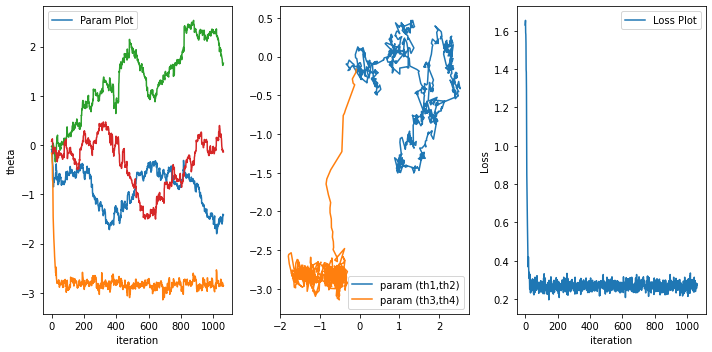

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
print('After 1000 iteration we have theta =',theta)
axes[0].plot(thdata)
axes[0].set_ylabel('theta')
axes[0].legend(['Param Plot'])
axes[0].set_xlabel('iteration')
axes[1].plot([item[2] for item in thdata],[item[3] for item in thdata],[item[0] for item in thdata],[item[1] for item in thdata])
axes[1].legend(['param (th1,th2)','param (th3,th4)'])

axes[2].plot(progress)
axes[2].legend(['Loss Plot'])
axes[2].set_ylabel('Loss')
axes[2].set_xlabel('iteration')
fig.tight_layout()

# Bad Circuit

In [54]:
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator, UnitarySimulator


backend = Aer.get_backend('qasm_simulator')
def lossCal2qubit(i,theta,nshot):    
    #i th data
    #parameter
    #return loss

    qr = QuantumRegister(2)
    cr = ClassicalRegister(2)
    qc = QuantumCircuit(qr,cr)

    qc.rx(a_shuffled[i][0],qr[0])
    qc.rx(a_shuffled[i][1],qr[1])
    
    qc.ry(pi/4,qr[:])
    qc.rz(pi/4,qr[:])
        


    qc.rx(theta,qr[0])


    qc.measure(qr[:],cr[:])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()
    lm=-1*(cN(count,'00')+cN(count,'01'))
    lp=1*(cN(count,'10')+cN(count,'11'))

    loss1=abs(
        (lm+lp)/nshot
        -2*(b_shuffled[i]-0.5)
    )
    loss2=((lm+lp)/nshot-2*(b_shuffled[i]-0.5))**2

    return loss1
lossCal2qubit(8,0,10)

1.8

In [55]:
#

theta=0;
def SPSA(i,th,c1,delta,nshot):
    return (lossCal2qubit(i,th+c1,nshot)-lossCal2qubit(i,th-c1,nshot))/(2*delta)

SPSA(1,theta,0.1,5,10000)

-0.0008000000000000007

In [56]:
progress=[];
theta=0;
thdata=[];

c1=0.1   
delta=6
nshot=1000;
theta=np.array(theta)-SPSA(1,theta,c1,delta,nshot)
for ep in range(1000):
    delta=random.random()+0.1
    theta=theta-SPSA(1,theta,c1,delta,nshot)
    print(ep,"th iteration L=",lossCal2qubit(1,theta,nshot))
    progress.append(lossCal2qubit(1,theta,nshot))
    thdata.append(theta)

0 th iteration L= 1.718
1 th iteration L= 1.702
2 th iteration L= 1.718
3 th iteration L= 1.702
4 th iteration L= 1.72
5 th iteration L= 1.71
6 th iteration L= 1.726
7 th iteration L= 1.696
8 th iteration L= 1.698
9 th iteration L= 1.698
10 th iteration L= 1.6840000000000002
11 th iteration L= 1.686
12 th iteration L= 1.746
13 th iteration L= 1.704
14 th iteration L= 1.718
15 th iteration L= 1.6840000000000002
16 th iteration L= 1.764
17 th iteration L= 1.6800000000000002
18 th iteration L= 1.654
19 th iteration L= 1.7
20 th iteration L= 1.708
21 th iteration L= 1.666
22 th iteration L= 1.714
23 th iteration L= 1.704
24 th iteration L= 1.714
25 th iteration L= 1.746
26 th iteration L= 1.686
27 th iteration L= 1.712
28 th iteration L= 1.71
29 th iteration L= 1.696
30 th iteration L= 1.688
31 th iteration L= 1.7
32 th iteration L= 1.726
33 th iteration L= 1.746
34 th iteration L= 1.658
35 th iteration L= 1.712
36 th iteration L= 1.658
37 th iteration L= 1.736
38 th iteration L= 1.682
39 

312 th iteration L= 1.73
313 th iteration L= 1.688
314 th iteration L= 1.678
315 th iteration L= 1.71
316 th iteration L= 1.692
317 th iteration L= 1.67
318 th iteration L= 1.708
319 th iteration L= 1.692
320 th iteration L= 1.712
321 th iteration L= 1.688
322 th iteration L= 1.702
323 th iteration L= 1.69
324 th iteration L= 1.712
325 th iteration L= 1.662
326 th iteration L= 1.718
327 th iteration L= 1.72
328 th iteration L= 1.702
329 th iteration L= 1.67
330 th iteration L= 1.67
331 th iteration L= 1.714
332 th iteration L= 1.698
333 th iteration L= 1.704
334 th iteration L= 1.6840000000000002
335 th iteration L= 1.688
336 th iteration L= 1.698
337 th iteration L= 1.65
338 th iteration L= 1.702
339 th iteration L= 1.734
340 th iteration L= 1.732
341 th iteration L= 1.696
342 th iteration L= 1.736
343 th iteration L= 1.706
344 th iteration L= 1.706
345 th iteration L= 1.698
346 th iteration L= 1.714
347 th iteration L= 1.708
348 th iteration L= 1.6840000000000002
349 th iteration L= 

609 th iteration L= 1.704
610 th iteration L= 1.696
611 th iteration L= 1.718
612 th iteration L= 1.7
613 th iteration L= 1.704
614 th iteration L= 1.6800000000000002
615 th iteration L= 1.6320000000000001
616 th iteration L= 1.704
617 th iteration L= 1.748
618 th iteration L= 1.702
619 th iteration L= 1.688
620 th iteration L= 1.708
621 th iteration L= 1.706
622 th iteration L= 1.696
623 th iteration L= 1.73
624 th iteration L= 1.704
625 th iteration L= 1.718
626 th iteration L= 1.692
627 th iteration L= 1.716
628 th iteration L= 1.69
629 th iteration L= 1.72
630 th iteration L= 1.714
631 th iteration L= 1.71
632 th iteration L= 1.678
633 th iteration L= 1.704
634 th iteration L= 1.6680000000000001
635 th iteration L= 1.674
636 th iteration L= 1.74
637 th iteration L= 1.6520000000000001
638 th iteration L= 1.6840000000000002
639 th iteration L= 1.734
640 th iteration L= 1.714
641 th iteration L= 1.7
642 th iteration L= 1.718
643 th iteration L= 1.708
644 th iteration L= 1.682
645 th i

909 th iteration L= 1.6640000000000001
910 th iteration L= 1.722
911 th iteration L= 1.718
912 th iteration L= 1.718
913 th iteration L= 1.69
914 th iteration L= 1.678
915 th iteration L= 1.716
916 th iteration L= 1.714
917 th iteration L= 1.692
918 th iteration L= 1.7
919 th iteration L= 1.722
920 th iteration L= 1.678
921 th iteration L= 1.688
922 th iteration L= 1.688
923 th iteration L= 1.7
924 th iteration L= 1.714
925 th iteration L= 1.708
926 th iteration L= 1.708
927 th iteration L= 1.694
928 th iteration L= 1.732
929 th iteration L= 1.6720000000000002
930 th iteration L= 1.698
931 th iteration L= 1.712
932 th iteration L= 1.736
933 th iteration L= 1.698
934 th iteration L= 1.738
935 th iteration L= 1.658
936 th iteration L= 1.732
937 th iteration L= 1.726
938 th iteration L= 1.698
939 th iteration L= 1.686
940 th iteration L= 1.686
941 th iteration L= 1.692
942 th iteration L= 1.702
943 th iteration L= 1.696
944 th iteration L= 1.718
945 th iteration L= 1.74
946 th iteration L

1204 th iteration L= 1.69
1205 th iteration L= 1.696
1206 th iteration L= 1.682
1207 th iteration L= 1.7
1208 th iteration L= 1.658
1209 th iteration L= 1.7
1210 th iteration L= 1.714
1211 th iteration L= 1.686
1212 th iteration L= 1.724
1213 th iteration L= 1.738
1214 th iteration L= 1.698
1215 th iteration L= 1.6680000000000001
1216 th iteration L= 1.726
1217 th iteration L= 1.72
1218 th iteration L= 1.6800000000000002
1219 th iteration L= 1.69
1220 th iteration L= 1.744
1221 th iteration L= 1.698
1222 th iteration L= 1.702
1223 th iteration L= 1.74
1224 th iteration L= 1.736
1225 th iteration L= 1.692
1226 th iteration L= 1.71
1227 th iteration L= 1.72
1228 th iteration L= 1.708
1229 th iteration L= 1.718
1230 th iteration L= 1.696
1231 th iteration L= 1.674
1232 th iteration L= 1.752
1233 th iteration L= 1.714
1234 th iteration L= 1.69
1235 th iteration L= 1.692
1236 th iteration L= 1.686
1237 th iteration L= 1.712
1238 th iteration L= 1.678
1239 th iteration L= 1.646
1240 th itera

1497 th iteration L= 1.706
1498 th iteration L= 1.6720000000000002
1499 th iteration L= 1.712
1500 th iteration L= 1.69
1501 th iteration L= 1.7
1502 th iteration L= 1.736
1503 th iteration L= 1.662
1504 th iteration L= 1.714
1505 th iteration L= 1.716
1506 th iteration L= 1.722
1507 th iteration L= 1.674
1508 th iteration L= 1.688
1509 th iteration L= 1.718
1510 th iteration L= 1.6640000000000001
1511 th iteration L= 1.722
1512 th iteration L= 1.72
1513 th iteration L= 1.732
1514 th iteration L= 1.728
1515 th iteration L= 1.72
1516 th iteration L= 1.674
1517 th iteration L= 1.654
1518 th iteration L= 1.708
1519 th iteration L= 1.694
1520 th iteration L= 1.712
1521 th iteration L= 1.692
1522 th iteration L= 1.6720000000000002
1523 th iteration L= 1.718
1524 th iteration L= 1.724
1525 th iteration L= 1.688
1526 th iteration L= 1.748
1527 th iteration L= 1.742
1528 th iteration L= 1.686
1529 th iteration L= 1.682
1530 th iteration L= 1.71
1531 th iteration L= 1.726
1532 th iteration L= 1

1787 th iteration L= 1.6760000000000002
1788 th iteration L= 1.6680000000000001
1789 th iteration L= 1.706
1790 th iteration L= 1.7
1791 th iteration L= 1.73
1792 th iteration L= 1.712
1793 th iteration L= 1.688
1794 th iteration L= 1.71
1795 th iteration L= 1.728
1796 th iteration L= 1.666
1797 th iteration L= 1.714
1798 th iteration L= 1.6840000000000002
1799 th iteration L= 1.6840000000000002
1800 th iteration L= 1.698
1801 th iteration L= 1.698
1802 th iteration L= 1.704
1803 th iteration L= 1.6680000000000001
1804 th iteration L= 1.692
1805 th iteration L= 1.692
1806 th iteration L= 1.728
1807 th iteration L= 1.716
1808 th iteration L= 1.678
1809 th iteration L= 1.712
1810 th iteration L= 1.69
1811 th iteration L= 1.6560000000000001
1812 th iteration L= 1.67
1813 th iteration L= 1.696
1814 th iteration L= 1.708
1815 th iteration L= 1.706
1816 th iteration L= 1.692
1817 th iteration L= 1.748
1818 th iteration L= 1.702
1819 th iteration L= 1.72
1820 th iteration L= 1.716
1821 th ite

KeyboardInterrupt: 

After 1000 iteration we have theta = -1.961526801261897


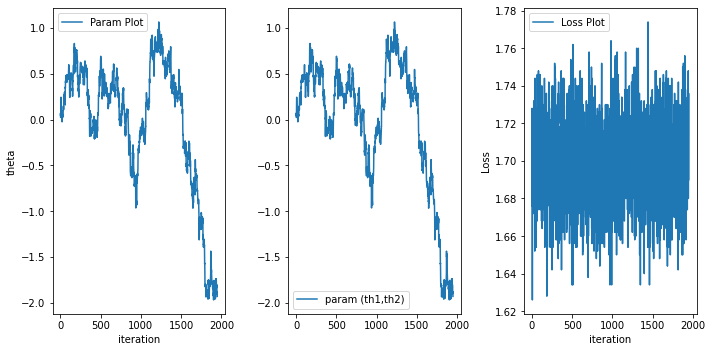

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
print('After 1000 iteration we have theta =',theta)
axes[0].plot(thdata)
axes[0].set_ylabel('theta')
axes[0].legend(['Param Plot'])
axes[0].set_xlabel('iteration')
axes[1].plot(thdata)
axes[1].legend(['param (th1,th2)','param (th3,th4)'])

axes[2].plot(progress)
axes[2].legend(['Loss Plot'])
axes[2].set_ylabel('Loss')
axes[2].set_xlabel('iteration')
fig.tight_layout()

# Bad Circuit,but not

In [65]:
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator, UnitarySimulator


backend = Aer.get_backend('qasm_simulator')
def lossCal2qubit(i,theta,nshot):    
    #i th data
    #parameter
    #return loss

    qr = QuantumRegister(2)
    cr = ClassicalRegister(2)
    qc = QuantumCircuit(qr,cr)

    qc.rx(a_shuffled[i][0],qr[0])
    qc.rx(a_shuffled[i][1],qr[1])
    
    qc.ry(pi/4,qr[:])
    qc.rz(pi/4,qr[:])
    
    
    count=0;
    for i in range(2):
        qc.rx(theta[count],qr[i])
        count=count+1


    qc.measure(qr[:],cr[:])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()
    lm=-1*(cN(count,'00')+cN(count,'01'))
    lp=1*(cN(count,'10')+cN(count,'11'))

    loss1=abs(
        (lm+lp)/nshot
        -2*(b_shuffled[i]-0.5)
    )
    loss2=((lm+lp)/nshot-2*(b_shuffled[i]-0.5))**2

    return loss1
lossCal2qubit(8,[1,1,1,1],10)

1.2

In [66]:
#

theta=[0,0];
def SPSA(i,th,c1,delta,nshot):
    sp=[];
    c2=[[c1,0],[0,c1]]
    for x1 in range(2):
        sp.append((lossCal2qubit(i,th+np.array(c2[x1]),nshot)-lossCal2qubit(i,th-np.array(c2[x1]),nshot))/(2*delta))
    return sp

SPSA(1,theta,0.1,5,10000)

[0.0005600000000000049, 0.006199999999999983]

In [67]:
progress=[];
theta=[0,0];
thdata=[];

c1=0.1   
delta=6
nshot=1000;
theta=np.array(theta)-SPSA(1,theta,c1,delta,nshot)
for ep in range(1000):
    delta=random.random()+0.1
    theta=theta-SPSA(1,theta,c1,delta,nshot)
    print(ep,"th iteration L=",lossCal2qubit(1,theta,nshot))
    progress.append(lossCal2qubit(1,theta,nshot))
    thdata.append(theta)

0 th iteration L= 1.6840000000000002
1 th iteration L= 1.674
2 th iteration L= 1.6059999999999999
3 th iteration L= 1.5659999999999998
4 th iteration L= 1.516
5 th iteration L= 1.432
6 th iteration L= 1.338
7 th iteration L= 1.32
8 th iteration L= 1.182
9 th iteration L= 1.168
10 th iteration L= 1.028
11 th iteration L= 0.942
12 th iteration L= 0.736
13 th iteration L= 0.624
14 th iteration L= 0.54
15 th iteration L= 0.516
16 th iteration L= 0.48
17 th iteration L= 0.39
18 th iteration L= 0.356
19 th iteration L= 0.33399999999999996
20 th iteration L= 0.244
21 th iteration L= 0.29800000000000004
22 th iteration L= 0.22199999999999998
23 th iteration L= 0.21599999999999997
24 th iteration L= 0.22799999999999998
25 th iteration L= 0.21399999999999997
26 th iteration L= 0.19799999999999995
27 th iteration L= 0.21599999999999997
28 th iteration L= 0.14600000000000002
29 th iteration L= 0.19399999999999995
30 th iteration L= 0.20199999999999996
31 th iteration L= 0.16600000000000004
32 th i

223 th iteration L= 0.18799999999999994
224 th iteration L= 0.17800000000000005
225 th iteration L= 0.21599999999999997
226 th iteration L= 0.18400000000000005
227 th iteration L= 0.20799999999999996
228 th iteration L= 0.17600000000000005
229 th iteration L= 0.21199999999999997
230 th iteration L= 0.21599999999999997
231 th iteration L= 0.19599999999999995
232 th iteration L= 0.19199999999999995
233 th iteration L= 0.19799999999999995
234 th iteration L= 0.19199999999999995
235 th iteration L= 0.20199999999999996
236 th iteration L= 0.20399999999999996
237 th iteration L= 0.19399999999999995
238 th iteration L= 0.18999999999999995
239 th iteration L= 0.19399999999999995
240 th iteration L= 0.18000000000000005
241 th iteration L= 0.20199999999999996
242 th iteration L= 0.21599999999999997
243 th iteration L= 0.19399999999999995
244 th iteration L= 0.20799999999999996
245 th iteration L= 0.242
246 th iteration L= 0.20799999999999996
247 th iteration L= 0.20999999999999996
248 th iterati

435 th iteration L= 0.21999999999999997
436 th iteration L= 0.18799999999999994
437 th iteration L= 0.20599999999999996
438 th iteration L= 0.20199999999999996
439 th iteration L= 0.19799999999999995
440 th iteration L= 0.20999999999999996
441 th iteration L= 0.19399999999999995
442 th iteration L= 0.20799999999999996
443 th iteration L= 0.20199999999999996
444 th iteration L= 0.18600000000000005
445 th iteration L= 0.20799999999999996
446 th iteration L= 0.19199999999999995
447 th iteration L= 0.21199999999999997
448 th iteration L= 0.19199999999999995
449 th iteration L= 0.20399999999999996
450 th iteration L= 0.20199999999999996
451 th iteration L= 0.17400000000000004
452 th iteration L= 0.21399999999999997
453 th iteration L= 0.18200000000000005
454 th iteration L= 0.17800000000000005
455 th iteration L= 0.18400000000000005
456 th iteration L= 0.19999999999999996
457 th iteration L= 0.19199999999999995
458 th iteration L= 0.21399999999999997
459 th iteration L= 0.17600000000000005


645 th iteration L= 0.17200000000000004
646 th iteration L= 0.20399999999999996
647 th iteration L= 0.18200000000000005
648 th iteration L= 0.18799999999999994
649 th iteration L= 0.17000000000000004
650 th iteration L= 0.20799999999999996
651 th iteration L= 0.21999999999999997
652 th iteration L= 0.21199999999999997
653 th iteration L= 0.22399999999999998
654 th iteration L= 0.19199999999999995
655 th iteration L= 0.19799999999999995
656 th iteration L= 0.22799999999999998
657 th iteration L= 0.18400000000000005
658 th iteration L= 0.21199999999999997
659 th iteration L= 0.18999999999999995
660 th iteration L= 0.18600000000000005
661 th iteration L= 0.20199999999999996
662 th iteration L= 0.19399999999999995
663 th iteration L= 0.17800000000000005
664 th iteration L= 0.17400000000000004
665 th iteration L= 0.21599999999999997
666 th iteration L= 0.21399999999999997
667 th iteration L= 0.19799999999999995
668 th iteration L= 0.20199999999999996
669 th iteration L= 0.20999999999999996


859 th iteration L= 0.21999999999999997
860 th iteration L= 0.21599999999999997
861 th iteration L= 0.21599999999999997
862 th iteration L= 0.20399999999999996
863 th iteration L= 0.19599999999999995
864 th iteration L= 0.19399999999999995
865 th iteration L= 0.21399999999999997
866 th iteration L= 0.19399999999999995
867 th iteration L= 0.17200000000000004
868 th iteration L= 0.22199999999999998
869 th iteration L= 0.20599999999999996
870 th iteration L= 0.19999999999999996
871 th iteration L= 0.20999999999999996
872 th iteration L= 0.18999999999999995
873 th iteration L= 0.18600000000000005
874 th iteration L= 0.22199999999999998
875 th iteration L= 0.19799999999999995
876 th iteration L= 0.17600000000000005
877 th iteration L= 0.236
878 th iteration L= 0.18000000000000005
879 th iteration L= 0.20199999999999996
880 th iteration L= 0.18200000000000005
881 th iteration L= 0.20199999999999996
882 th iteration L= 0.18400000000000005
883 th iteration L= 0.20599999999999996
884 th iterati

KeyboardInterrupt: 

After 1000 iteration we have theta = [-3.08576468 -2.62843079]


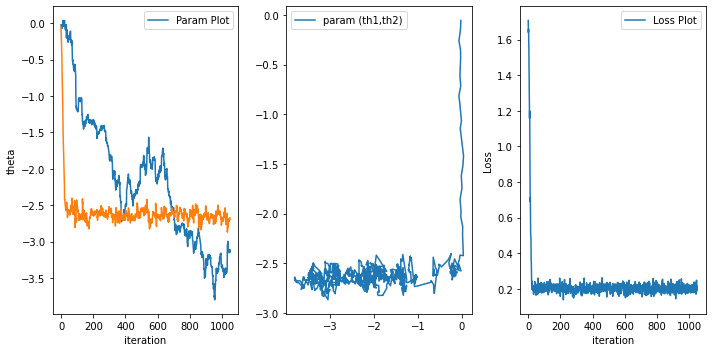

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
print('After 1000 iteration we have theta =',theta)
axes[0].plot(thdata)
axes[0].set_ylabel('theta')
axes[0].legend(['Param Plot'])
axes[0].set_xlabel('iteration')
axes[1].plot([item[0] for item in thdata],[item[1] for item in thdata])
axes[1].legend(['param (th1,th2)','param (th3,th4)'])

axes[2].plot(progress)
axes[2].legend(['Loss Plot'])
axes[2].set_ylabel('Loss')
axes[2].set_xlabel('iteration')
fig.tight_layout()

# ?

In [70]:
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator, UnitarySimulator


backend = Aer.get_backend('qasm_simulator')
def lossCal2qubit(i,theta,nshot):    
    #i th data
    #parameter
    #return loss

    qr = QuantumRegister(2)
    cr = ClassicalRegister(2)
    qc = QuantumCircuit(qr,cr)

    qc.rx(a_shuffled[i][0],qr[0])
    qc.rx(a_shuffled[i][1],qr[1])
    
    qc.ry(pi/4,qr[:])
    qc.rz(pi/4,qr[:])
    
    
    count=0;
    for i in range(2):
        qc.rz(theta[count],qr[i])
        count=count+1


    qc.measure(qr[:],cr[:])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()
    lm=-1*(cN(count,'00')+cN(count,'01'))
    lp=1*(cN(count,'10')+cN(count,'11'))

    loss1=abs(
        (lm+lp)/nshot
        -2*(b_shuffled[i]-0.5)
    )
    loss2=((lm+lp)/nshot-2*(b_shuffled[i]-0.5))**2

    return loss1
lossCal2qubit(8,[1,1,1,1],10)

1.8

In [71]:
#

theta=[0,0];
def SPSA(i,th,c1,delta,nshot):
    sp=[];
    c2=[[c1,0],[0,c1]]
    for x1 in range(2):
        sp.append((lossCal2qubit(i,th+np.array(c2[x1]),nshot)-lossCal2qubit(i,th-np.array(c2[x1]),nshot))/(2*delta))
    return sp

SPSA(1,theta,0.1,5,10000)

[0.001540000000000008, 0.00026000000000001575]

In [72]:
progress=[];
theta=[0,0];
thdata=[];

c1=0.1   
delta=6
nshot=1000;
theta=np.array(theta)-SPSA(1,theta,c1,delta,nshot)
for ep in range(1000):
    delta=random.random()+0.1
    theta=theta-SPSA(1,theta,c1,delta,nshot)
    print(ep,"th iteration L=",lossCal2qubit(1,theta,nshot))
    progress.append(lossCal2qubit(1,theta,nshot))
    thdata.append(theta)

0 th iteration L= 1.714
1 th iteration L= 1.712
2 th iteration L= 1.71
3 th iteration L= 1.71
4 th iteration L= 1.646
5 th iteration L= 1.686
6 th iteration L= 1.702
7 th iteration L= 1.678
8 th iteration L= 1.694
9 th iteration L= 1.71
10 th iteration L= 1.6560000000000001
11 th iteration L= 1.692
12 th iteration L= 1.67
13 th iteration L= 1.698
14 th iteration L= 1.686
15 th iteration L= 1.72
16 th iteration L= 1.6800000000000002
17 th iteration L= 1.692
18 th iteration L= 1.6680000000000001
19 th iteration L= 1.742
20 th iteration L= 1.728
21 th iteration L= 1.706
22 th iteration L= 1.726
23 th iteration L= 1.712
24 th iteration L= 1.724
25 th iteration L= 1.72
26 th iteration L= 1.71
27 th iteration L= 1.67
28 th iteration L= 1.744
29 th iteration L= 1.67
30 th iteration L= 1.712
31 th iteration L= 1.6760000000000002
32 th iteration L= 1.734
33 th iteration L= 1.6840000000000002
34 th iteration L= 1.702
35 th iteration L= 1.692
36 th iteration L= 1.696
37 th iteration L= 1.732
38 t

300 th iteration L= 1.6760000000000002
301 th iteration L= 1.704
302 th iteration L= 1.6720000000000002
303 th iteration L= 1.662
304 th iteration L= 1.6720000000000002
305 th iteration L= 1.69
306 th iteration L= 1.724
307 th iteration L= 1.6600000000000001
308 th iteration L= 1.688
309 th iteration L= 1.694
310 th iteration L= 1.674
311 th iteration L= 1.724
312 th iteration L= 1.6840000000000002
313 th iteration L= 1.76
314 th iteration L= 1.6800000000000002
315 th iteration L= 1.678
316 th iteration L= 1.708
317 th iteration L= 1.6480000000000001
318 th iteration L= 1.6800000000000002
319 th iteration L= 1.7
320 th iteration L= 1.696
321 th iteration L= 1.71
322 th iteration L= 1.6840000000000002
323 th iteration L= 1.6480000000000001
324 th iteration L= 1.702
325 th iteration L= 1.72
326 th iteration L= 1.662
327 th iteration L= 1.688
328 th iteration L= 1.694
329 th iteration L= 1.6560000000000001
330 th iteration L= 1.6680000000000001
331 th iteration L= 1.708
332 th iteration L

592 th iteration L= 1.706
593 th iteration L= 1.702
594 th iteration L= 1.708
595 th iteration L= 1.688
596 th iteration L= 1.692
597 th iteration L= 1.7
598 th iteration L= 1.6800000000000002
599 th iteration L= 1.704
600 th iteration L= 1.704
601 th iteration L= 1.726
602 th iteration L= 1.692
603 th iteration L= 1.702
604 th iteration L= 1.706
605 th iteration L= 1.708
606 th iteration L= 1.6840000000000002
607 th iteration L= 1.698
608 th iteration L= 1.724
609 th iteration L= 1.67
610 th iteration L= 1.72
611 th iteration L= 1.686
612 th iteration L= 1.6840000000000002
613 th iteration L= 1.712
614 th iteration L= 1.72
615 th iteration L= 1.6640000000000001
616 th iteration L= 1.71
617 th iteration L= 1.696
618 th iteration L= 1.678
619 th iteration L= 1.71
620 th iteration L= 1.6640000000000001
621 th iteration L= 1.6840000000000002
622 th iteration L= 1.674
623 th iteration L= 1.746
624 th iteration L= 1.72
625 th iteration L= 1.666
626 th iteration L= 1.734
627 th iteration L= 

890 th iteration L= 1.692
891 th iteration L= 1.726
892 th iteration L= 1.686
893 th iteration L= 1.724
894 th iteration L= 1.698
895 th iteration L= 1.6800000000000002
896 th iteration L= 1.698
897 th iteration L= 1.71
898 th iteration L= 1.6800000000000002
899 th iteration L= 1.706
900 th iteration L= 1.6720000000000002
901 th iteration L= 1.728
902 th iteration L= 1.654
903 th iteration L= 1.6840000000000002
904 th iteration L= 1.692
905 th iteration L= 1.686
906 th iteration L= 1.702
907 th iteration L= 1.666
908 th iteration L= 1.716
909 th iteration L= 1.728
910 th iteration L= 1.638
911 th iteration L= 1.674
912 th iteration L= 1.726
913 th iteration L= 1.698
914 th iteration L= 1.686
915 th iteration L= 1.732
916 th iteration L= 1.71
917 th iteration L= 1.72
918 th iteration L= 1.682
919 th iteration L= 1.6760000000000002
920 th iteration L= 1.744
921 th iteration L= 1.722
922 th iteration L= 1.6800000000000002
923 th iteration L= 1.692
924 th iteration L= 1.694
925 th iteratio

After 1000 iteration we have theta = [ 2.56597767 -0.64589963]


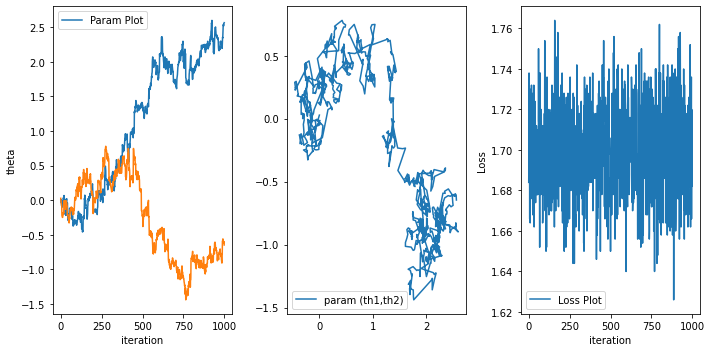

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
print('After 1000 iteration we have theta =',theta)
axes[0].plot(thdata)
axes[0].set_ylabel('theta')
axes[0].legend(['Param Plot'])
axes[0].set_xlabel('iteration')
axes[1].plot([item[0] for item in thdata],[item[1] for item in thdata])
axes[1].legend(['param (th1,th2)','param (th3,th4)'])

axes[2].plot(progress)
axes[2].legend(['Loss Plot'])
axes[2].set_ylabel('Loss')
axes[2].set_xlabel('iteration')
fig.tight_layout()